In [33]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import pickle
from wordcloud import WordCloud

In [34]:
np.__version__

'1.24.1'

In [35]:
full_hand_set = pd.read_csv('../input_data/full_datasets/fully_hand_labelled_output.csv')

In [36]:
Corpus = full_hand_set

In [37]:
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0', 'Unnamed: 0.1', 'label_id'], axis=1, inplace=True)

In [38]:
Corpus

,text,Roken,Alcohol,Drugs
0,Beloop: PatiÃ«nte heeft 10 minuten van te vor...,Niets gevonden,Niets gevonden,Niets gevonden
1,Beloop: G5P4 36 wkGrav 1e lijnALL geen Hb Pat...,Niets gevonden,Niets gevonden,Niets gevonden
2,Conclusie: Normale nacontrole. Kijkt goed ter...,Niets gevonden,Niets gevonden,Niets gevonden
3,Beleid: Algemeen: Dagopname voor 3x PC a 2.5...,Niets gevonden,Niets gevonden,Niets gevonden
4,Anamnese: 34W4D,Niets gevonden,Niets gevonden,Niets gevonden
...,...,...,...,...
4695,Beloop: CONSULTENKAMERGezien door co-ass Y. T...,Geen gebruiker,Geen gebruiker,Geen gebruiker
4696,Reden van komst / Verwijzing: Reden verwijzin...,Geen gebruiker,Geen gebruiker,Geen gebruiker
4697,"Beloop: MR CPG7P4M4 // MI: 4x sectio ia, 1x ...",Geen gebruiker,Geen gebruiker,Geen gebruiker
4698,Reden van komst / Verwijzing: Reden van komst...,Geen gebruiker,Geen gebruiker,Geen gebruiker


In [39]:
rook_corpus = Corpus[["text", "Roken"]].rename(columns={"Roken":"label"})

In [40]:
rook_corpus

,text,label
0,Beloop: PatiÃ«nte heeft 10 minuten van te vor...,Niets gevonden
1,Beloop: G5P4 36 wkGrav 1e lijnALL geen Hb Pat...,Niets gevonden
2,Conclusie: Normale nacontrole. Kijkt goed ter...,Niets gevonden
3,Beleid: Algemeen: Dagopname voor 3x PC a 2.5...,Niets gevonden
4,Anamnese: 34W4D,Niets gevonden
...,...,...
4695,Beloop: CONSULTENKAMERGezien door co-ass Y. T...,Geen gebruiker
4696,Reden van komst / Verwijzing: Reden verwijzin...,Geen gebruiker
4697,"Beloop: MR CPG7P4M4 // MI: 4x sectio ia, 1x ...",Geen gebruiker
4698,Reden van komst / Verwijzing: Reden van komst...,Geen gebruiker


In [41]:
rook_corpus['text'] = rook_corpus['text'].str.replace('\t',' ')
rook_corpus.drop_duplicates(inplace=True)
rook_corpus['text'] = rook_corpus['text'].astype(str)

In [42]:
stemmer = SnowballStemmer("dutch")
rook_corpus['text'] = rook_corpus['text'].str.lower()
rook_corpus['text'] = [stemmer.stem(text) for text in rook_corpus['text']]
rook_corpus = rook_corpus.drop(rook_corpus[rook_corpus.label == '--'].index)
rook_corpus_backup = rook_corpus.copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(rook_corpus['text'], rook_corpus['label'], test_size=0.2, random_state=50, stratify=rook_corpus['label'])

In [13]:
X_test

4163    anamnese:   verkort consult: div kno ingrepen ...
4231    samenvatting:  hypermetroop +6 / +7 d. 18.11.2...
1740    samenvatting:  klinisch - hoofdstamstenose har...
4458    beloop:  beloop: mevr heeft haar afspraak van ...
3083    anamnese:   verkort consult: aandachtspunten u...
                              ...                        
1090    uitslag microbiologie  [initials][lastname]   ...
2528    beloop:  beloop: cardiale voorgeschiedenis 202...
649     geachte collega,   uw bovenstaande patiã«nte i...
3273    anamnese:   verkort consult: ivm cocaine gebru...
4142    anamnese:   vraagstelling: aanvrager: froeling...
Name: text, Length: 940, dtype: object

In [43]:
model = pickle.load(open('best_models/best_smoking_ex1.pkl', "rb"))

In [44]:
model

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(ngram_range=(2,
                                                                           2),
                                                              token_pattern='(?u)\\b\\w\\w+\\b|\\+|\\-')),
                                             ('clf',
                                              SGDClassifier(early_stopping=True,
                                                            validation_fraction=0.25,
                                                            verbose=3))]),
                   param_distributions={'clf__average': [True, False],
                                        'clf__class_weight': ['balanced', None],
                                        'clf__epsilon': <scipy.stats._distn_infrastructure.r...
                                        'clf__penalty': ['l2', 'l1'],
                                        'clf__power_t': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7faefe27eb50>,
                                        'clf__shuffle': [True, False],
                                        'clf__tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7faf02a6c2b0>,
                                        'clf__warm_start': [True, False],
                                        'tfidf__max_df': [0.9, 0.95],
                                        'tfidf__min_df': [3, 5]},
                   random_state=500, scoring='f1_macro', verbose=3)

In [55]:
pred_y = model.predict(X_test)

In [57]:
pred_y

array(['Rookte', 'Niets gevonden', 'Rookt niet', 'Niets gevonden',
       'Rookte', 'Niets gevonden', 'Niets gevonden', 'Rookte', 'Rookte',
       'Rookte', 'Niets gevonden', 'Niets gevonden', 'Niets gevonden',
       'Niets gevonden', 'Niets gevonden', 'Niets gevonden',
       'Niets gevonden', 'Niets gevonden', 'Rookt niet', 'Rookte',
       'Rookt niet', 'Niets gevonden', 'Niets gevonden', 'Niets gevonden',
       'Rookt niet', 'Rookte', 'Rookt niet', 'Rookte', 'Niets gevonden',
       'Rookt', 'Niets gevonden', 'Niets gevonden', 'Niets gevonden',
       'Niets gevonden', 'Rookte', 'Niets gevonden', 'Rookte',
       'Niets gevonden', 'Rookt', 'Rookte', 'Rookt niet',
       'Niets gevonden', 'Rookt niet', 'Rookte', 'Niets gevonden',
       'Rookt niet', 'Rookt niet', 'Rookt niet', 'Niets gevonden',
       'Niets gevonden', 'Niets gevonden', 'Rookte', 'Niets gevonden',
       'Niets gevonden', 'Niets gevonden', 'Niets gevonden', 'Rookte',
       'Niets gevonden', 'Niets gevonden', 'Ni

In [46]:
rook_corpus['predicted_smoking'] = predicted

In [47]:
rook_corpus

,text,label,predicted_smoking
0,beloop: patiã«nte heeft 10 minuten van te vor...,Niets gevonden,Niets gevonden
1,beloop: g5p4 36 wkgrav 1e lijnall geen hb pat...,Niets gevonden,Niets gevonden
2,conclusie: normale nacontrole. kijkt goed ter...,Niets gevonden,Niets gevonden
3,beleid: algemeen: dagopname voor 3x pc a 2.5...,Niets gevonden,Niets gevonden
4,anamnese: 34w4d,Niets gevonden,Niets gevonden
...,...,...,...
4695,beloop: consultenkamergezien door co-ass y. t...,Geen gebruiker,Rookt niet
4696,reden van komst / verwijzing: reden verwijzin...,Geen gebruiker,Rookt niet
4697,"beloop: mr cpg7p4m4 // mi: 4x sectio ia, 1x ...",Geen gebruiker,Rookt niet
4698,reden van komst / verwijzing: reden van komst...,Geen gebruiker,Rookt niet


In [49]:
rook_corpus.predicted_smoking.unique()

array(['Niets gevonden', 'Rookt niet', 'Rookte', 'Rookt'], dtype=object)

In [48]:
rook_corpus[rook_corpus['predicted_smoking'].isnull()]

,text,label,predicted_smoking


In [50]:
rook_corpus

,text,label,predicted_smoking
0,beloop: patiã«nte heeft 10 minuten van te vor...,Niets gevonden,Niets gevonden
1,beloop: g5p4 36 wkgrav 1e lijnall geen hb pat...,Niets gevonden,Niets gevonden
2,conclusie: normale nacontrole. kijkt goed ter...,Niets gevonden,Niets gevonden
3,beleid: algemeen: dagopname voor 3x pc a 2.5...,Niets gevonden,Niets gevonden
4,anamnese: 34w4d,Niets gevonden,Niets gevonden
...,...,...,...
4695,beloop: consultenkamergezien door co-ass y. t...,Geen gebruiker,Rookt niet
4696,reden van komst / verwijzing: reden verwijzin...,Geen gebruiker,Rookt niet
4697,"beloop: mr cpg7p4m4 // mi: 4x sectio ia, 1x ...",Geen gebruiker,Rookt niet
4698,reden van komst / verwijzing: reden van komst...,Geen gebruiker,Rookt niet


In [54]:
X_train, X_test, y_train, y_test = train_test_split(rook_corpus['text'], rook_corpus['label'], test_size=0.2, random_state=50, stratify=rook_corpus['label'])

In [51]:
pred_y= = rook_corpus['predicted_smoking'].replace({'Rookt':'Huidige gebruiker', 
                                                                             'Rookte':'Voormalige gebruiker',
                                                                             'Rookt niet': 'Geen gebruiker'})

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (4).

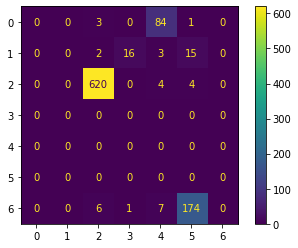

In [56]:
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(rook_corpus.label.unique()))
disp.plot()


In [53]:
print(metrics.classification_report(list(rook_corpus['label']), list(rook_corpus['predicted_smoking']),
    target_names=list(rook_corpus.label.unique())))

                      precision    recall  f1-score   support

      Niets gevonden       0.85      0.94      0.89       439
Voormalige gebruiker       0.93      0.47      0.62       179
   Huidige gebruiker       0.98      0.99      0.98      3143
      Geen gebruiker       0.92      0.95      0.94       939

            accuracy                           0.95      4700
           macro avg       0.92      0.84      0.86      4700
        weighted avg       0.96      0.95      0.95      4700

